In [6]:
!pip install pandas
!pip install matplotlib

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
def load_combine(csv_files):
    columns_to_analyze = [
        'accuracy', 'f1', 'fpr', 'fnr',
    ]
    ndfs = []
    for file in csv_files:
        df = pd.read_csv(file)
        ndfs.append(df)
    combined_df = pd.concat(ndfs, ignore_index=True)  
    return combined_df

In [54]:
# def compute_mean_std(attack,combined_df ) -> None:
#     attack_df = combined_df[combined_df['Attack Type'] == attack]
    
#     # Store epsilons in a dictionary
#     epsilons = {
#         'eps1': attack_df[attack_df['Epsilon'] == 0.00],
#         'eps2': attack_df[attack_df['Epsilon'] == 0.01],
#         'eps3': attack_df[attack_df['Epsilon'] == 0.10],
#         'eps4': attack_df[attack_df['Epsilon'] == 0.15],
#     }
    
#     for name, df in epsilons.items():
#         # Drop non-metric columns
#         metrics_df = df.drop(columns=['Run ID', 'Epsilon', 'Attack Type','loss','recall','roc_auc', 'precision','pr_auc'], errors='ignore')
#         print(metrics_df.head())
#         # Calculate mean and std
#         mean_series = (metrics_df.mean() * 100).round(2)
#         std_series = (metrics_df.std() * 100).round(2)
        
        
#         # Combine into a single DataFrame
#         result_df = pd.DataFrame([mean_series, std_series], index=['mean', 'std'])
        
#         print(f"\n{name} (Epsilon = {df['Epsilon'].iloc[0]}):")
#         print(result_df)


def compute_mean_std(attack, combined_df):
    attack_df = combined_df[combined_df['Attack Type'] == attack]
    
    # Store epsilons in a dictionary
    epsilons = {
        0.00: attack_df[attack_df['Epsilon'] == 0.00],
        0.01: attack_df[attack_df['Epsilon'] == 0.01],
        0.10: attack_df[attack_df['Epsilon'] == 0.10],
        0.15: attack_df[attack_df['Epsilon'] == 0.15],
    }
    
    results = {}

    for epsilon_val, df in epsilons.items():
        # Drop non-metric columns
        metrics_df = df.drop(columns=[
            'Run ID', 'Epsilon', 'Attack Type',
            'loss', 'recall', 'roc_auc', 'precision', 'pr_auc'
        ], errors='ignore')
        
        # Skip if there's no relevant data
        if metrics_df.empty:
            continue
        
        # Calculate mean and std
        mean_series = (metrics_df.mean() * 100).round(2)
        std_series = (metrics_df.std() * 100).round(2)

        # Combine into a DataFrame
        result_df = pd.DataFrame([mean_series, std_series], index=['mean', 'std'])

        results[epsilon_val] = result_df

    return results

In [87]:
def plot_accuracy_vs_epsilon_multi(results_dicts, attack):
    plt.figure(figsize=(8, 5))

    # Define a style map for different layer settings
    style_map = {
        '2 Layers': {'color': '#377eb8', 'linestyle': '--', 'marker': 's'},
        '5 Layers': {'color': '#ff7f00', 'linestyle': '-', 'marker': 'o'},
        '10 Layers': {'color': '#4daf4a', 'linestyle': ':', 'marker': '^'},
        '50 Layers': {'color': '#984ea3', 'linestyle': '-.', 'marker': 'd'}
    }

    for label, results in results_dicts:
        stats = []
        for epsilon, df in sorted(results.items()):
            if 'accuracy' in df.columns:
                mean_acc = df.loc['mean', 'accuracy']
                std_acc = df.loc['std', 'accuracy']
                stats.append({
                    'Epsilon': epsilon,
                    'Mean': mean_acc,
                    'Std': std_acc
                })

        if not stats:
            continue

        stats_df = pd.DataFrame(stats).dropna().sort_values(by='Epsilon')
        epsilons = stats_df["Epsilon"].values
        means = stats_df["Mean"].values
        stds = stats_df["Std"].values

        style = style_map.get(label, {})
        plt.errorbar(
            x=range(len(epsilons)),
            y=means,
            yerr=stds,
            label=label,
            fmt=style.get('linestyle', '-') + style.get('marker', 'o'),
            color=style.get('color', None),
            capsize=5,
            markersize=6,
            linewidth=2
        )

    plt.title(f"Accuracy vs. Epsilon ({attack.upper()} Attack)", fontsize=18, fontweight='bold')
    plt.xlabel("Epsilon", fontsize=20, fontweight='bold')
    plt.ylabel("Accuracy (%)", fontsize=20, fontweight='bold')
    plt.xticks(ticks=range(len(epsilons)), labels=[str(e) for e in epsilons], fontsize=14)
    # plt.yticks(fontsize=20)
    plt.yticks([0, 20, 40, 60,80], fontsize=20)
    plt.xticks(fontsize=20)
    # plt.ylim(0, 100)
    # plt.xlim(-0.01, 0.16)
    plt.ylim(0, 80)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(fontsize=12, frameon=True)
    plt.tight_layout()
    plt.show()


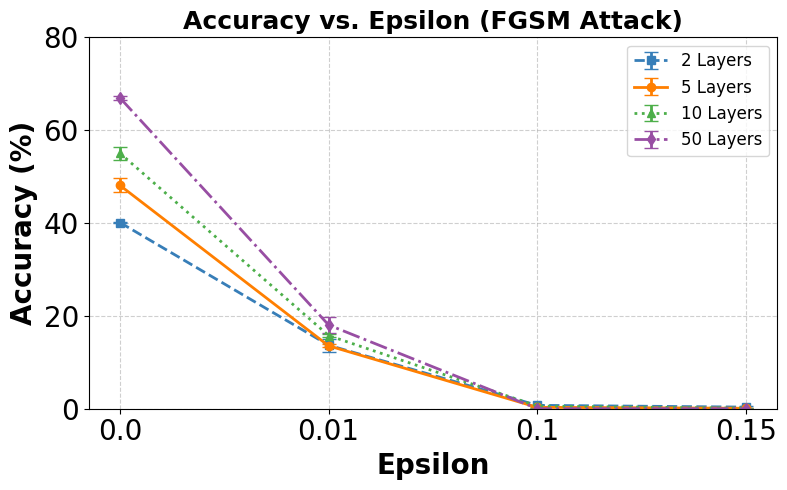

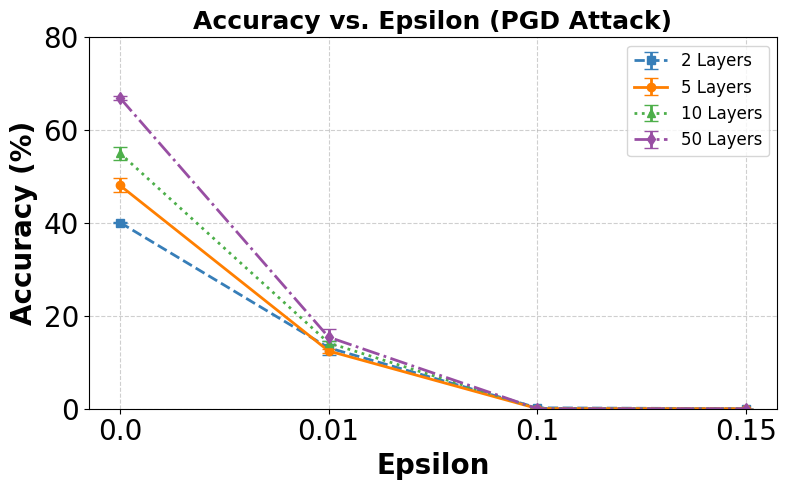

In [89]:
df_2 = load_combine([
    'qmlp-az-run_run1-layer2_Amplitude_all_attacks.csv',
    'qmlp-az-run_run2-layer2_Amplitude_all_attacks.csv',
    'qmlp-az-run_run3-layer2_Amplitude_all_attacks.csv'
])
df_5 = load_combine([
    'qmlp-az-run_run1-layer5_Amplitude_all_attacks.csv',
    'qmlp-az-run_run2-layer5_Amplitude_all_attacks.csv',
    'qmlp-az-run_run3-layer5_Amplitude_all_attacks.csv'
])
df_10 = load_combine([
    'qmlp-az-run_run1-layer10_Amplitude_all_attacks.csv',
    'qmlp-az-run_run2-layer10_Amplitude_all_attacks.csv',
    'qmlp-az-run_run3-layer10_Amplitude_all_attacks.csv'
])
df_50 = load_combine([
    'qmlp-az-run_run1-layer50_Amplitude_all_attacks.csv',
    'qmlp-az-run_run2-layer50_Amplitude_all_attacks.csv',
    'qmlp-az-run_run3-layer50_Amplitude_all_attacks.csv'
])
# print('FGSM')
# compute_mean_std('fgsm',df)
fgsm_2 = compute_mean_std('fgsm', df_2)
fgsm_5 = compute_mean_std('fgsm', df_5)
fgsm_10 = compute_mean_std('fgsm', df_10)
fgsm_50 = compute_mean_std('fgsm', df_50)

plot_accuracy_vs_epsilon_multi([
    ("2 Layers", fgsm_2),
    ("5 Layers", fgsm_5),
    ("10 Layers", fgsm_10),
    ("50 Layers", fgsm_50)
], attack='fgsm')


# print('PGD')
# compute_mean_std('pgd',df)

pgd_2 = compute_mean_std('pgd', df_2)
pgd_5 = compute_mean_std('pgd', df_5)
pgd_10 = compute_mean_std('pgd', df_10)
pgd_50 = compute_mean_std('pgd', df_50)

plot_accuracy_vs_epsilon_multi([
    ("2 Layers", pgd_2),
    ("5 Layers", pgd_5),
    ("10 Layers", pgd_10),
    ("50 Layers", pgd_50)
], attack='pgd')


In [ ]:

df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)


# print('PGD')
# compute_mean_std('pgd',df)

FGSM


{0.0:       accuracy     f1   fpr    fnr
 mean     55.04  53.88  2.05  45.83
 std       1.36   0.40  0.06   1.27,
 0.01:       accuracy     f1   fpr    fnr
 mean     15.76  16.48  3.84  84.74
 std       0.26   1.38  0.01   0.47,
 0.1:       accuracy    f1   fpr    fnr
 mean      0.57  0.39  4.54  99.46
 std       0.32  0.21  0.01   0.31,
 0.15:       accuracy    f1   fpr    fnr
 mean      0.11  0.06  4.56  99.90
 std       0.07  0.02  0.00   0.07}

In [ ]:
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     66.96  65.41  1.51  34.21
 std       0.40   0.34  0.02   0.18,
 0.01:       accuracy     f1   fpr    fnr
 mean     15.43  16.41  3.86  84.85
 std       1.70   0.77  0.08   1.72,
 0.1:       accuracy   f1   fpr    fnr
 mean       0.0  0.0  4.56  100.0
 std        0.0  0.0  0.00    0.0,
 0.15:       accuracy   f1   fpr    fnr
 mean       0.0  0.0  4.55  100.0
 std        0.0  0.0  0.00    0.0}

In [59]:
csv_files = [
    'qmlp-az-run_run1-layer2_Angle_Angle_all_attacks.csv',
    'qmlp-az-run_run2-layer2_Angle_Angle_all_attacks.csv',
    'qmlp-az-run_run3-layer2_Angle_Angle_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     51.30  50.14  2.22  49.41
 std       0.24   0.34  0.01   0.29,
 0.01:       accuracy     f1   fpr    fnr
 mean     14.67  13.41  3.89  86.54
 std       0.08   1.27  0.00   0.02,
 0.1:       accuracy     f1   fpr    fnr
 mean     11.18  10.20  4.05  89.74
 std       0.08   1.03  0.00   0.03,
 0.15:       accuracy    f1   fpr    fnr
 mean      9.57  8.65  4.12  91.20
 std       0.07  0.55  0.00   0.03}

In [60]:
csv_files = [
    'qmlp-az-run_run1-layer10_Angle_Angle_all_attacks.csv',
    'qmlp-az-run_run2-layer10_Angle_Angle_all_attacks.csv',
    'qmlp-az-run_run3-layer10_Angle_Angle_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     54.81  53.52  2.06  45.81
 std       0.44   0.51  0.02   0.65,
 0.01:       accuracy     f1   fpr    fnr
 mean     15.30  14.57  3.86  86.08
 std       2.48   3.02  0.11   2.11,
 0.1:       accuracy     f1   fpr    fnr
 mean     11.28  10.80  4.05  89.73
 std       1.71   2.26  0.07   1.43,
 0.15:       accuracy    f1   fpr    fnr
 mean      9.44  8.82  4.13  91.41
 std       1.52  1.98  0.06   1.27}

In [61]:
# qmlp-mnist-run_run1-layer2_Angle_all_attacks.csv
csv_files = [
    'qmlp-mnist-run_run1-layer2_Angle_all_attacks.csv',
    'qmlp-mnist-run_run2-layer2_Angle_all_attacks.csv',
    'qmlp-mnist-run_run3-layer2_Angle_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     65.93  65.05  3.79  34.68
 std       1.04   1.03  0.12   1.12,
 0.01:       accuracy     f1   fpr    fnr
 mean     30.06  35.11  7.71  68.79
 std       0.27   1.63  0.03   0.28,
 0.1:       accuracy    f1    fpr    fnr
 mean      2.36  2.04  10.78  97.46
 std       0.12  0.14   0.01   0.13,
 0.15:       accuracy    f1    fpr    fnr
 mean      0.50  0.21  10.99  99.46
 std       0.03  0.04   0.01   0.03}

In [62]:
csv_files = [
    'qmlp-mnist-run_run1-layer10_Angle_all_attacks.csv',
    'qmlp-mnist-run_run2-layer10_Angle_all_attacks.csv',
    'qmlp-mnist-run_run3-layer10_Angle_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     71.72  71.16  3.14  28.80
 std       1.80   1.81  0.20   1.86,
 0.01:       accuracy     f1   fpr    fnr
 mean     26.27  33.17  8.13  72.69
 std       3.62   2.37  0.39   3.51,
 0.1:       accuracy    f1    fpr    fnr
 mean      2.62  1.87  10.75  97.21
 std       0.61  0.22   0.08   0.67,
 0.15:       accuracy    f1    fpr    fnr
 mean      0.64  0.34  10.98  99.32
 std       0.28  0.17   0.04   0.31}

In [63]:
csv_files = [
    'qmlp-mnist-run_run1-layer50_Angle_all_attacks.csv',
    'qmlp-mnist-run_run2-layer50_Angle_all_attacks.csv',
    'qmlp-mnist-run_run3-layer50_Angle_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     76.89  76.61  2.57  23.46
 std       0.43   0.35  0.05   0.43,
 0.01:       accuracy     f1   fpr    fnr
 mean     25.37  32.71  8.23  73.60
 std       0.34   1.88  0.04   0.39,
 0.1:       accuracy    f1    fpr    fnr
 mean      2.56  2.82  10.75  97.35
 std       0.10  0.20   0.00   0.08,
 0.15:       accuracy    f1    fpr    fnr
 mean      0.73  0.65  10.97  99.24
 std       0.12  0.14   0.02   0.12}

In [64]:
csv_files = [
    'qmlp-mnist-run_run1-layer50_Amplitude_all_attacks.csv',
    'qmlp-mnist-run_run2-layer50_Amplitude_all_attacks.csv',
    'qmlp-mnist-run_run3-layer50_Amplitude_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr   fnr
 mean     92.64  92.56  0.82  7.44
 std       0.49   0.51  0.05  0.52,
 0.01:       accuracy     f1   fpr    fnr
 mean     21.92  26.13  8.67  77.90
 std       1.72   2.17  0.20   1.71,
 0.1:       accuracy   f1    fpr    fnr
 mean       0.0  0.0  11.11  100.0
 std        0.0  0.0   0.01    0.0,
 0.15:       accuracy   f1    fpr    fnr
 mean       0.0  0.0  11.11  100.0
 std        0.0  0.0   0.01    0.0}

In [65]:
csv_files = [
    'qmlp-mnist-run_run1-layer10_Amplitude_all_attacks.csv',
    'qmlp-mnist-run_run2-layer10_Amplitude_all_attacks.csv',
    'qmlp-mnist-run_run3-layer10_Amplitude_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     79.82  79.56  2.24  20.47
 std       1.03   1.10  0.11   1.07,
 0.01:       accuracy     f1   fpr    fnr
 mean     19.20  21.38  8.97  80.69
 std       3.37   5.19  0.37   3.37,
 0.1:       accuracy    f1    fpr    fnr
 mean      0.10  0.06  11.09  99.90
 std       0.15  0.09   0.01   0.15,
 0.15:       accuracy   f1    fpr    fnr
 mean       0.0  0.0  11.10  100.0
 std        0.0  0.0   0.01    0.0}

In [66]:
csv_files = [
    'qmlp-mnist-run_run1-layer2_Amplitude_all_attacks.csv',
    'qmlp-mnist-run_run2-layer2_Amplitude_all_attacks.csv',
    'qmlp-mnist-run_run3-layer2_Amplitude_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     65.93  65.05  3.79  34.68
 std       1.04   1.03  0.12   1.12,
 0.01:       accuracy     f1   fpr    fnr
 mean     29.94  34.98  7.72  68.92
 std       0.27   1.54  0.03   0.27,
 0.1:       accuracy    f1    fpr    fnr
 mean      2.38  2.03  10.78  97.43
 std       0.03  0.09   0.01   0.03,
 0.15:       accuracy    f1    fpr    fnr
 mean      0.48  0.27  10.99  99.47
 std       0.09  0.11   0.01   0.09}

In [67]:
csv_files = [
    'qmlp-az-run_run1-layer50_Angle_Angle_all_attacks.csv',
    'qmlp-az-run_run2-layer50_Angle_Angle_all_attacks.csv',
    'qmlp-az-run_run3-layer50_Angle_Angle_all_attacks.csv'
]
df = load_combine(csv_files)
print('FGSM')
compute_mean_std('fgsm',df)
print('PGD')
compute_mean_std('pgd',df)

FGSM
PGD


{0.0:       accuracy     f1   fpr    fnr
 mean     32.38  29.45  3.09  69.58
 std       0.90   1.48  0.04   0.88,
 0.01:       accuracy    f1   fpr    fnr
 mean      4.20  3.50  4.37  96.19
 std       0.32  0.25  0.02   0.31,
 0.1:       accuracy    f1   fpr    fnr
 mean      1.05  0.69  4.52  99.05
 std       0.05  0.01  0.00   0.04,
 0.15:       accuracy    f1   fpr    fnr
 mean      0.57  0.38  4.54  99.48
 std       0.10  0.07  0.01   0.10}